In [1]:
import pandas as pd

df = pd.DataFrame( {
    'A' : ['a', 'b','c', 'a','b'],
    'B' : [1,2,3,1,0]
})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [3]:
df['le_A'] = le.transform(df['A'])
df 

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [4]:
le.transform(['a','b'])

array([0, 1])

In [5]:
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [7]:
le.inverse_transform([1,2,0,2])

array(['b', 'c', 'a', 'c'], dtype=object)

In [8]:
df = pd.DataFrame({
    'A' : [10,20,-10,0,25],
    'B' : [1,2,3,1,0]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [10]:
mms.data_max_, mms.data_min_

(array([25.,  3.]), array([-10.,   0.]))

In [11]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [12]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [14]:
ss.mean_ , ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [15]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [16]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [17]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

# Robust Scaler

In [32]:
df = pd.DataFrame({
    'A' : [-0,1. , 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [34]:
df_scaler = df.copy()

In [36]:
df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [37]:
df_scaler

,A,MinMax,Standard,Robust
0,0.0,0.00,-0.690306,-0.500
1,1.0,0.20,-0.007586,0.750
2,0.1,0.02,-0.622034,-0.375
3,0.2,0.04,-0.553762,-0.250
4,0.3,0.06,-0.485490,-0.125
5,0.4,0.08,-0.417218,0.000
6,1.0,0.20,-0.007586,0.750
7,1.1,0.22,0.060686,0.875
8,5.0,1.00,2.723294,5.750


<Axes: >

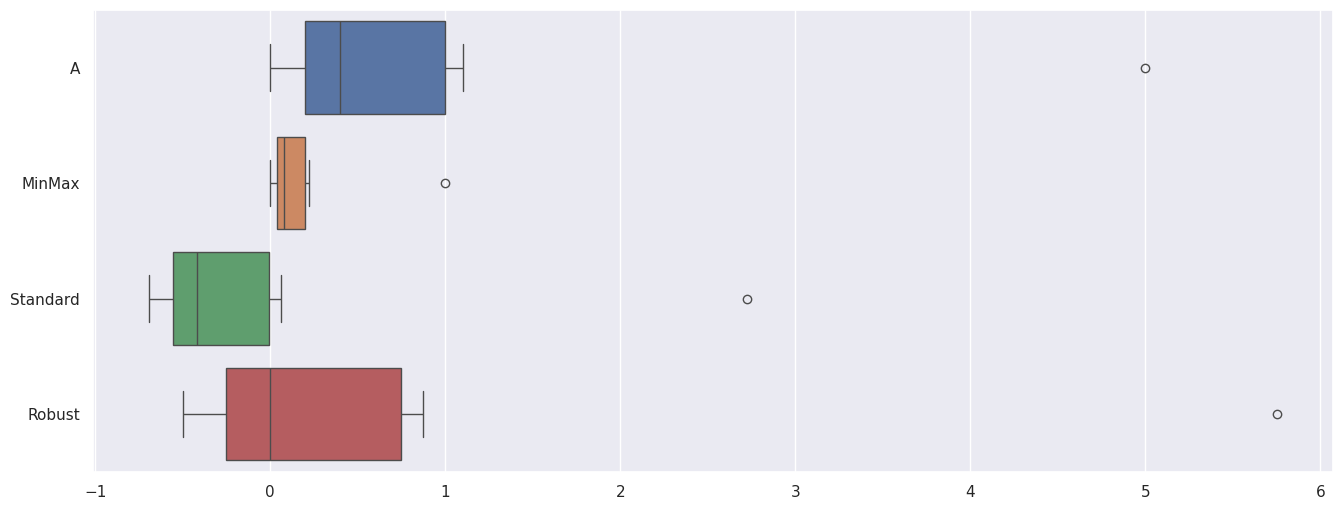

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,6))
sns.boxplot(data= df_scaler, orient='h')